In [6]:
# Print Python and Conda versions
!python --version

Python 3.10.9


In [7]:
# Local path to data
DATA_DIR = '/projects/bachelor-thesis/data'

# Define and clear temp working directory
TMP_DIR = '/projects/bachelor-thesis/tmp'

!ls $DATA_DIR

masks  raw_data_32TNS_1C  raw_data_32TNS_2A


In [8]:
# get date out of filename
DATES = !ls "$DATA_DIR/raw_data_32TNS_1C" | cut -c 12-26 | uniq

In [8]:
!rm -rf $TMP_DIR
!mkdir -p $TMP_DIR

# unzip all the data
for date in DATES:
    !unzip "$DATA_DIR/raw_data_32TNS_1C/"$(ls "$DATA_DIR/raw_data_32TNS_1C" | grep $date) -d $TMP_DIR
    !unzip "$DATA_DIR/raw_data_32TNS_2A/"$(ls "$DATA_DIR/raw_data_32TNS_2A" | grep $date) -d $TMP_DIR

Archive:  /projects/bachelor-thesis/data/raw_data_32TNS_1C/S2B_MSIL1C_20210710T101559_N0301_R065_T32TNS_20210710T122740.zip
 extracting: /projects/bachelor-thesis/tmp/S2B_MSIL1C_20210710T101559_N0301_R065_T32TNS_20210710T122740.SAFE/MTD_MSIL1C.xml  
 extracting: /projects/bachelor-thesis/tmp/S2B_MSIL1C_20210710T101559_N0301_R065_T32TNS_20210710T122740.SAFE/INSPIRE.xml  
 extracting: /projects/bachelor-thesis/tmp/S2B_MSIL1C_20210710T101559_N0301_R065_T32TNS_20210710T122740.SAFE/manifest.safe  
   creating: /projects/bachelor-thesis/tmp/S2B_MSIL1C_20210710T101559_N0301_R065_T32TNS_20210710T122740.SAFE/AUX_DATA/
 extracting: /projects/bachelor-thesis/tmp/S2B_MSIL1C_20210710T101559_N0301_R065_T32TNS_20210710T122740.SAFE/GRANULE/L1C_T32TNS_A022685_20210710T102312/MTD_TL.xml  
 extracting: /projects/bachelor-thesis/tmp/S2B_MSIL1C_20210710T101559_N0301_R065_T32TNS_20210710T122740.SAFE/GRANULE/L1C_T32TNS_A022685_20210710T102312/IMG_DATA/T32TNS_20210710T101559_B03.jp2  
 extracting: /projects/b

In [9]:
date = DATES[0]

In [10]:
import rasterio

description = ["Coastal aerosol", "Blue", "Green", "Red", "Vegetation Red Edge 1", "Vegetation Red Edge 2",
               "Vegetation Red Edge 3", "NIR", "Vegetation Red Edge 4", "Water vapour", "SWIR - Cirrus",
               "SWIR 1", "SWIR 2", "True Color Image"]

MSK_CLDPRB_20m = "MSK_CLDPRB_20m.jp2"
MSK_CLDPRB_60m = "MSK_CLDPRB_60m.jp2"
MSK_SNWPRB_20m = "MSK_SNWPRB_20m.jp2"
MSK_SNWPRB_60m = "MSK_SNWPRB_60m.jp2"

# Search for a folder starting with "S2B_MSIL1C_$DATE"
FOLDER = !ls $TMP_DIR | grep "S2B_MSIL1C_$date"
FOLDER = FOLDER[0]

BASE_PATH = f"{TMP_DIR}/{FOLDER}/GRANULE/"

# list all subfolders of the base path
SUBFOLDER = !ls $BASE_PATH
BASE_PATH += '/' + SUBFOLDER[0] + '/IMG_DATA'

B01 = f"T32TNS_{date}_B01.jp2"
B02 = f"T32TNS_{date}_B02.jp2"
B03 = f"T32TNS_{date}_B03.jp2"
B04 = f"T32TNS_{date}_B04.jp2"
B05 = f"T32TNS_{date}_B05.jp2"
B06 = f"T32TNS_{date}_B06.jp2"
B07 = f"T32TNS_{date}_B07.jp2"
B08 = f"T32TNS_{date}_B08.jp2"
B8A = f"T32TNS_{date}_B8A.jp2"
B09 = f"T32TNS_{date}_B09.jp2"
B10 = f"T32TNS_{date}_B10.jp2"
B11 = f"T32TNS_{date}_B11.jp2"
B12 = f"T32TNS_{date}_B12.jp2"
TCI = f"T32TNS_{date}_TCI.jp2"

bands_files = [B01, B02, B03, B04, B05, B06, B07, B08, B8A, B09, B10, B11, B12, TCI]
bands_files = [f"{BASE_PATH}/{band}" for band in bands_files]

# Open all the bands
bands = [rasterio.open(band) for band in bands_files]

# add description to bands
for i, band in enumerate(bands):
    band.description = description[i]
    bands[i] = band

band_B01 = bands[0]
band_B02 = bands[1]
band_B03 = bands[2]
band_B04 = bands[3]
band_B05 = bands[4]
band_B06 = bands[5]
band_B07 = bands[6]
band_B08 = bands[7]
band_B8A = bands[8]
band_B09 = bands[9]
band_B10 = bands[10]
band_B11 = bands[11]
band_B12 = bands[12]
band_TCI = bands[13]

# Search for a folder starting with "S2B_MSIL1C_$DATE"
FOLDER = !ls $TMP_DIR | grep "S2B_MSIL2A_$date"
FOLDER = FOLDER[0]

BASE_PATH = f"{TMP_DIR}/{FOLDER}/GRANULE/"

# list all subfolders of the base path
SUBFOLDER = !ls $BASE_PATH
BASE_PATH += '/' + SUBFOLDER[0] + '/QI_DATA'

mask_cldprb_20m = rasterio.open(f"{BASE_PATH}/{MSK_CLDPRB_20m}")
mask_cldprb_60m = rasterio.open(f"{BASE_PATH}/{MSK_CLDPRB_60m}")
mask_snwprb_20m = rasterio.open(f"{BASE_PATH}/{MSK_SNWPRB_20m}")
mask_snwprb_60m = rasterio.open(f"{BASE_PATH}/{MSK_SNWPRB_60m}")

In [11]:
# create folder for masks
MASKS_DIR = f"{DATA_DIR}/masks/{date}"
!mkdir -p $MASKS_DIR

In [12]:
import numpy as np
import rasterio

# Create mask_coverage for a new date

# Get the CRS, transform, and shape of the band
crs = band_B02.crs
transform = band_B02.transform
height = band_B02.height
width = band_B02.width
shape = (height, width)

# Set up the options for creating the empty JP2 file
profile = {
    'driver': 'JP2OpenJPEG',
    'dtype': np.uint8,
    'nodata': 0,
    'width': width,
    'height': height,
    'count': 1,
    'crs': crs,
    'transform': transform,
    'blockxsize': 512,
    'blockysize': 512,
}

mask_coverage_path = f"{MASKS_DIR}/mask_coverage.jp2"
# Create the empty JP2 file
with rasterio.open(mask_coverage_path, 'w', **profile) as mask_coverage:
    # create a square in the center of the image
    mask_coverage.write(np.zeros((1, height, width), dtype='uint8'))

In [13]:
def mark_windows(pixel_windows): # (x, y, w, h)
    with rasterio.open(mask_coverage_path, 'r+', **profile) as mask:
        for pixel_window in pixel_windows:
            mask.write(np.ones((1, pixel_window[2], pixel_window[3]), dtype='uint8'), window=Window(*pixel_window))

In [14]:
mark_windows([(512, 512, 512, 512), (1024, 1024, 512, 512)])

In [15]:
from rasterio.windows import Window
from scipy import ndimage


def load_marked_windows():
    with rasterio.open(mask_coverage_path, 'r', **profile) as mask:
        img = mask.read(1)

        labeled, n_comps = ndimage.label(img)

        # create a list to store the windows
        pixel_windows = []

        # loop through the connected components
        for i in range(1, n_comps + 1):
            # find the bounding box of the component
            rows, cols = np.where(labeled == i)
            y1, x1 = rows.min(), cols.min()
            y2, x2 = rows.max(), cols.max()

            # create a window from the bounding box
            window = (x1, y1, x2 - x1 + 1, y2 - y1 + 1)
            pixel_windows.append(window)

        # return the list of windows
        return pixel_windows

In [16]:
import numpy as np

def find_uncovered_square(rectangles, shape):
    # create a binary matrix to represent the area
    area = np.zeros(shape, dtype=bool)

    # mark all covered positions as True in the area matrix
    for rect in rectangles:
        x, y, w, h = rect
        area[x:x+w, y:y+h] = True

    # find the first position that is not covered by any rectangle
    uncovered_pos = np.where(area == False)

    # return a square of size 512x512 centered on the uncovered position
    x, y = uncovered_pos[0][0], uncovered_pos[1][0]

    window = [x+int((512-w)/2), y+int((512-h)/2), 512, 512]

    # if necessary, shift the window such that is lies within the shape
    if window[0] < 0:
        window[0] = 0
    if window[1] < 0:
        window[1] = 0
    if window[0] + window[2] > shape[0]:
        window[0] = shape[0] - window[2]
    if window[1] + window[3] > shape[1]:
        window[1] = shape[1] - window[3]

    return window

In [17]:
find_uncovered_square(load_marked_windows(), shape)

[0, 0, 512, 512]

In [18]:
rectangles = load_marked_windows()

for i in range(2):
    window = find_uncovered_square(rectangles, shape)

    rectangles.append(window)
    print("Window", i, window)

mark_windows(rectangles)

Window 0 [0, 0, 512, 512]
Window 1 [0, 512, 512, 512]


[512, 1536, 512, 512]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Axes: >

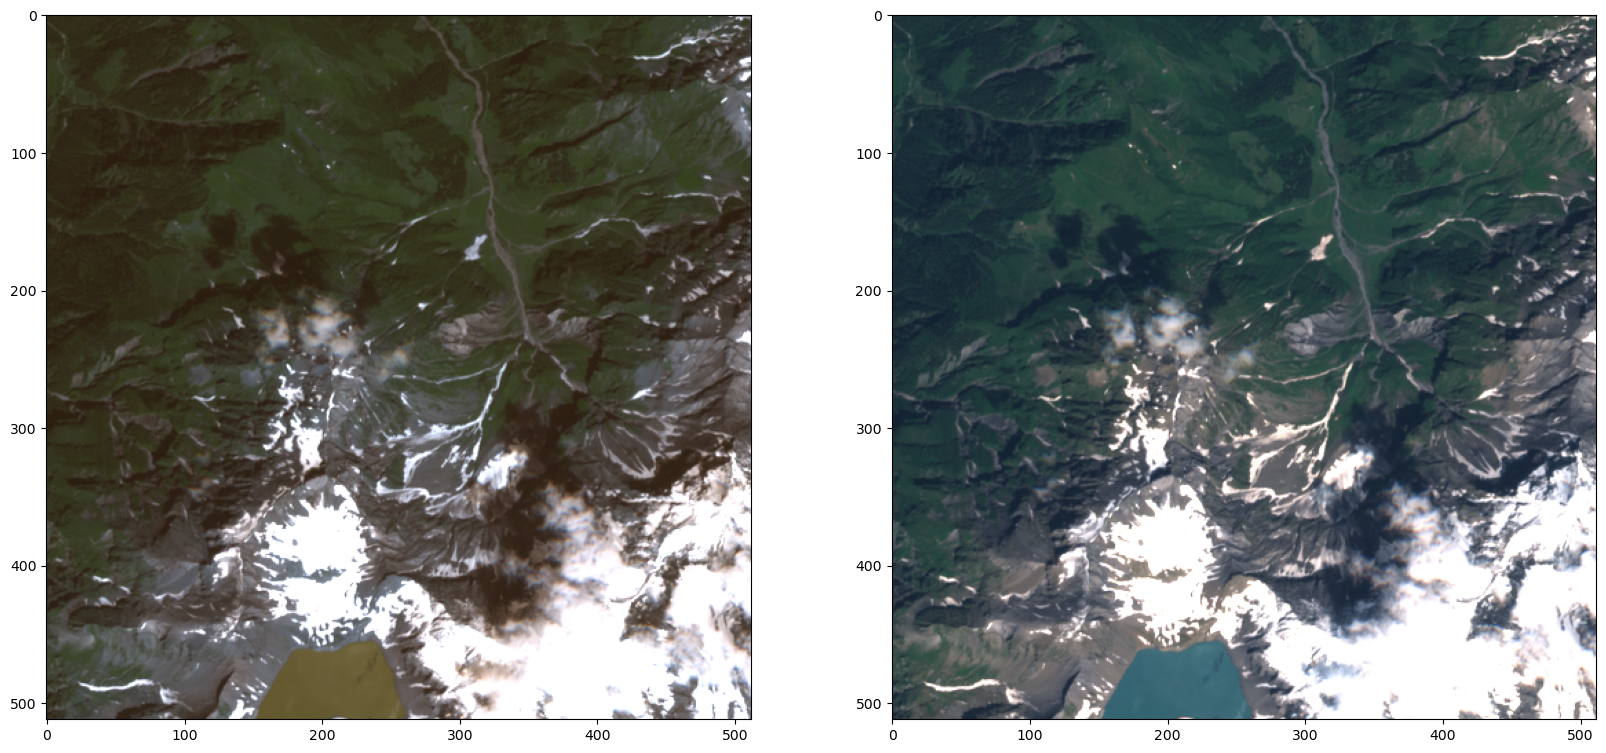

In [19]:
from rasterio.plot import show
import matplotlib.pyplot as plt

# Combine bands B02, B03, B12 to a false color image
false_color_rgb = np.dstack((
    band_B02.read(1, window=Window(*window)),
    band_B03.read(1, window=Window(*window)),
    band_B04.read(1, window=Window(*window))
))

false_color_rgb = false_color_rgb.transpose(2, 0, 1)

# Convert to 0-255 range
max_val = np.max(false_color_rgb)
false_color_rgb = (false_color_rgb / 4_000).astype(np.float32)

# Plot the false_color_rgb along with the TCI
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
show(false_color_rgb, ax=ax[0])
show(band_TCI.read(window=Window(*window)), ax=ax[1])

In [20]:
from s2cloudless import S2PixelCloudDetector

# As we are looking at the cloud probability map, we can set the threshold to 0.0
cloud_detector = S2PixelCloudDetector(threshold=0, average_over=4, dilation_size=0, all_bands=True)

In [30]:
from rasterio.windows import Window
import numpy as np
import cv2

# sort bands by resolution
bands_windowed = [None] * len(bands)

for i, band in enumerate(bands):

    # window is defined using pixel index over 10m resolution
    window_adjusted = [int(x * 10.0 / band.res[0]) for x in window]
    print(window_adjusted)
    cropped_img = band.read(window=Window(*window_adjusted))
    bands_windowed[i] = cropped_img

# index of first band with 60m resolution
first_10m_band = next(i for i, band in enumerate(bands) if band.res[0] == 10.0)
first_10m_band = bands_windowed[first_10m_band].shape[1:]

bands_windowed_resized = [None] * len(bands)

for i, img in enumerate(bands_windowed):
    bands_windowed_resized[i] = np.transpose(
        cv2.resize(np.transpose(img), dsize=first_10m_band, interpolation=cv2.INTER_LINEAR))



# Drop the TCI band
index = next(i for i, band in enumerate(bands) if band.description == "True Color Image")
s2cloudless_data = bands_windowed_resized.copy()
windowed_TCI_band = s2cloudless_data.pop(index)
s2cloudless_data = np.array(s2cloudless_data) / 10000.0

s2cloudless_data = np.transpose(s2cloudless_data, (1, 2, 0))

# add a dimension for the batch size
s2cloudless_data = np.expand_dims(s2cloudless_data, axis=0)

# Open downloaded cloud prop
downloaded_cloud_probs = mask_cldprb_20m.read()
downloaded_cloud_probs = np.transpose(cv2.resize(np.transpose(img), dsize=first_10m_band, interpolation=cv2.INTER_LINEAR))
downloaded_cloud_probs = downloaded_cloud_probs / 100.0

# Compute cloud probabilities
cloud_probs = cloud_detector.get_cloud_probability_maps(s2cloudless_data)

[0, 85, 85, 85]
[0, 512, 512, 512]
[0, 512, 512, 512]
[0, 512, 512, 512]
[0, 256, 256, 256]
[0, 256, 256, 256]
[0, 256, 256, 256]
[0, 512, 512, 512]
[0, 256, 256, 256]
[0, 85, 85, 85]
[0, 85, 85, 85]
[0, 256, 256, 256]
[0, 256, 256, 256]
[0, 512, 512, 512]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Axes: >

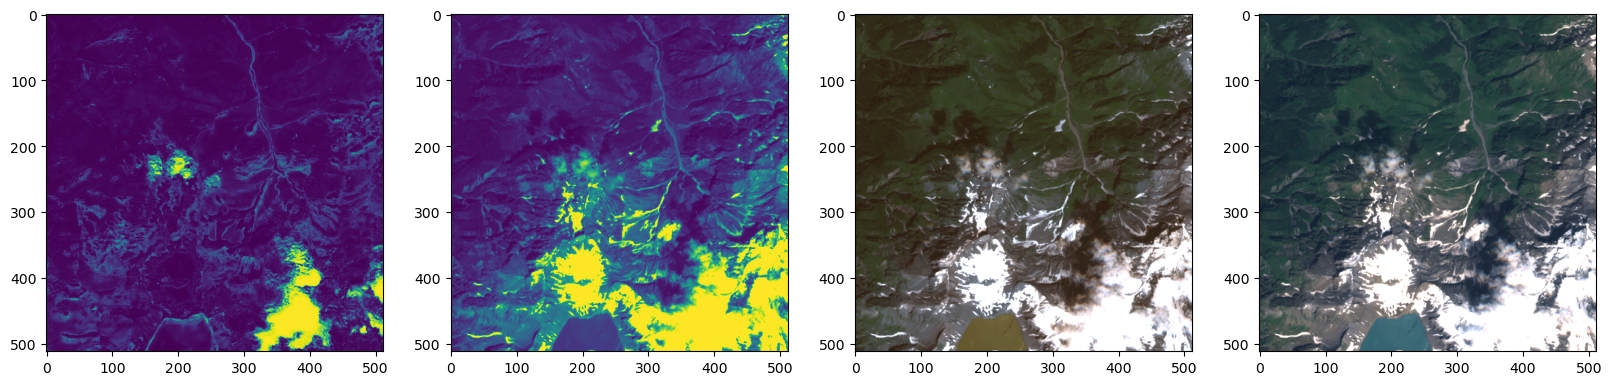

In [37]:
import matplotlib.pyplot as plt
from rasterio.plot import show

# Plot the cloud probability map
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
show(cloud_probs[0], ax=ax[0])
show(downloaded_cloud_probs[0], ax=ax[1])
show(false_color_rgb, ax=ax[2])
show(band_TCI.read(window=Window(*window)), ax=ax[3])